## Praca domowa 6
### Julia Kruk

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# źródło: https://github.com/morethanbooks/projects.git

info = pd.read_csv("ontology.csv", sep = "\t")
info.head()

,id,type,Label,FreqSum,subtype,gender
0,andu,pla,Anduin,109,pla,NaN
1,arag,per,Aragorn,1069,men,male
2,arat,per,Arathorn,36,men,male
3,arwe,per,Arwen,51,elves,female
4,bage,pla,Bag End,77,pla,NaN


In [2]:
networks = pd.read_csv("networks-id-volume1.csv")
networks.head()

,IdSource,IdTarget,Weight,Type
0,frod,sams,171,undirected
1,frod,ganda,129,undirected
2,arag,frod,105,undirected
3,bilb,frod,96,undirected
4,frod,pipp,80,undirected


In [3]:
# zamiana id na odpowiadające im imiona
# wybranie tylko postaci 
networks = pd.merge(networks, info, left_on = "IdSource", right_on = "id", how = "left")
networks = networks[networks["type"] == "per"]
networks = networks[["Label", "IdTarget", "Weight", "Type"]]
networks = networks.rename(columns = {"Label": "Source"})
networks = pd.merge(networks, info, left_on = "IdTarget", right_on = "id", how = "left")
networks = networks[networks["type"] == "per"]
networks = networks[["Source", "Label", "Weight", "Type"]]
networks = networks.rename(columns = {"Label": "Target"})
networks.head()

,Source,Target,Weight,Type
0,Frodo,Sam,171,undirected
1,Frodo,Gandalf,129,undirected
2,Aragorn,Frodo,105,undirected
3,Bilbo,Frodo,96,undirected
4,Frodo,Pippin,80,undirected


In [4]:
lotr_graph = nx.from_pandas_edgelist(networks, "Source", "Target", edge_attr = ["Weight", "Type"], create_using = nx.Graph())
pos = nx.kamada_kawai_layout(lotr_graph)

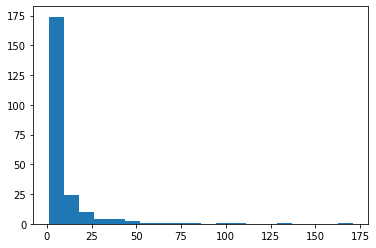

In [5]:
# sprawdzenie jak rozkłada się atrybut "weight"
weights = np.array([e[2]["Weight"] for e in lotr_graph.edges(data = True)])
max_weight = np.max(weights)
plt.hist(weights, bins = 20)
plt.show()

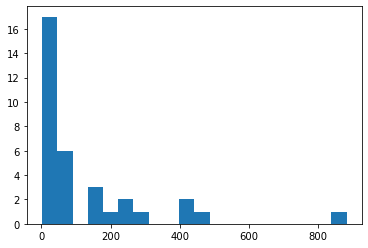

In [6]:
node_degree = dict(lotr_graph.degree(weight = "Weight"))
node_size = np.array([node_degree[n] for n in lotr_graph.nodes()])
plt.hist(node_size, bins = 20)
plt.show()

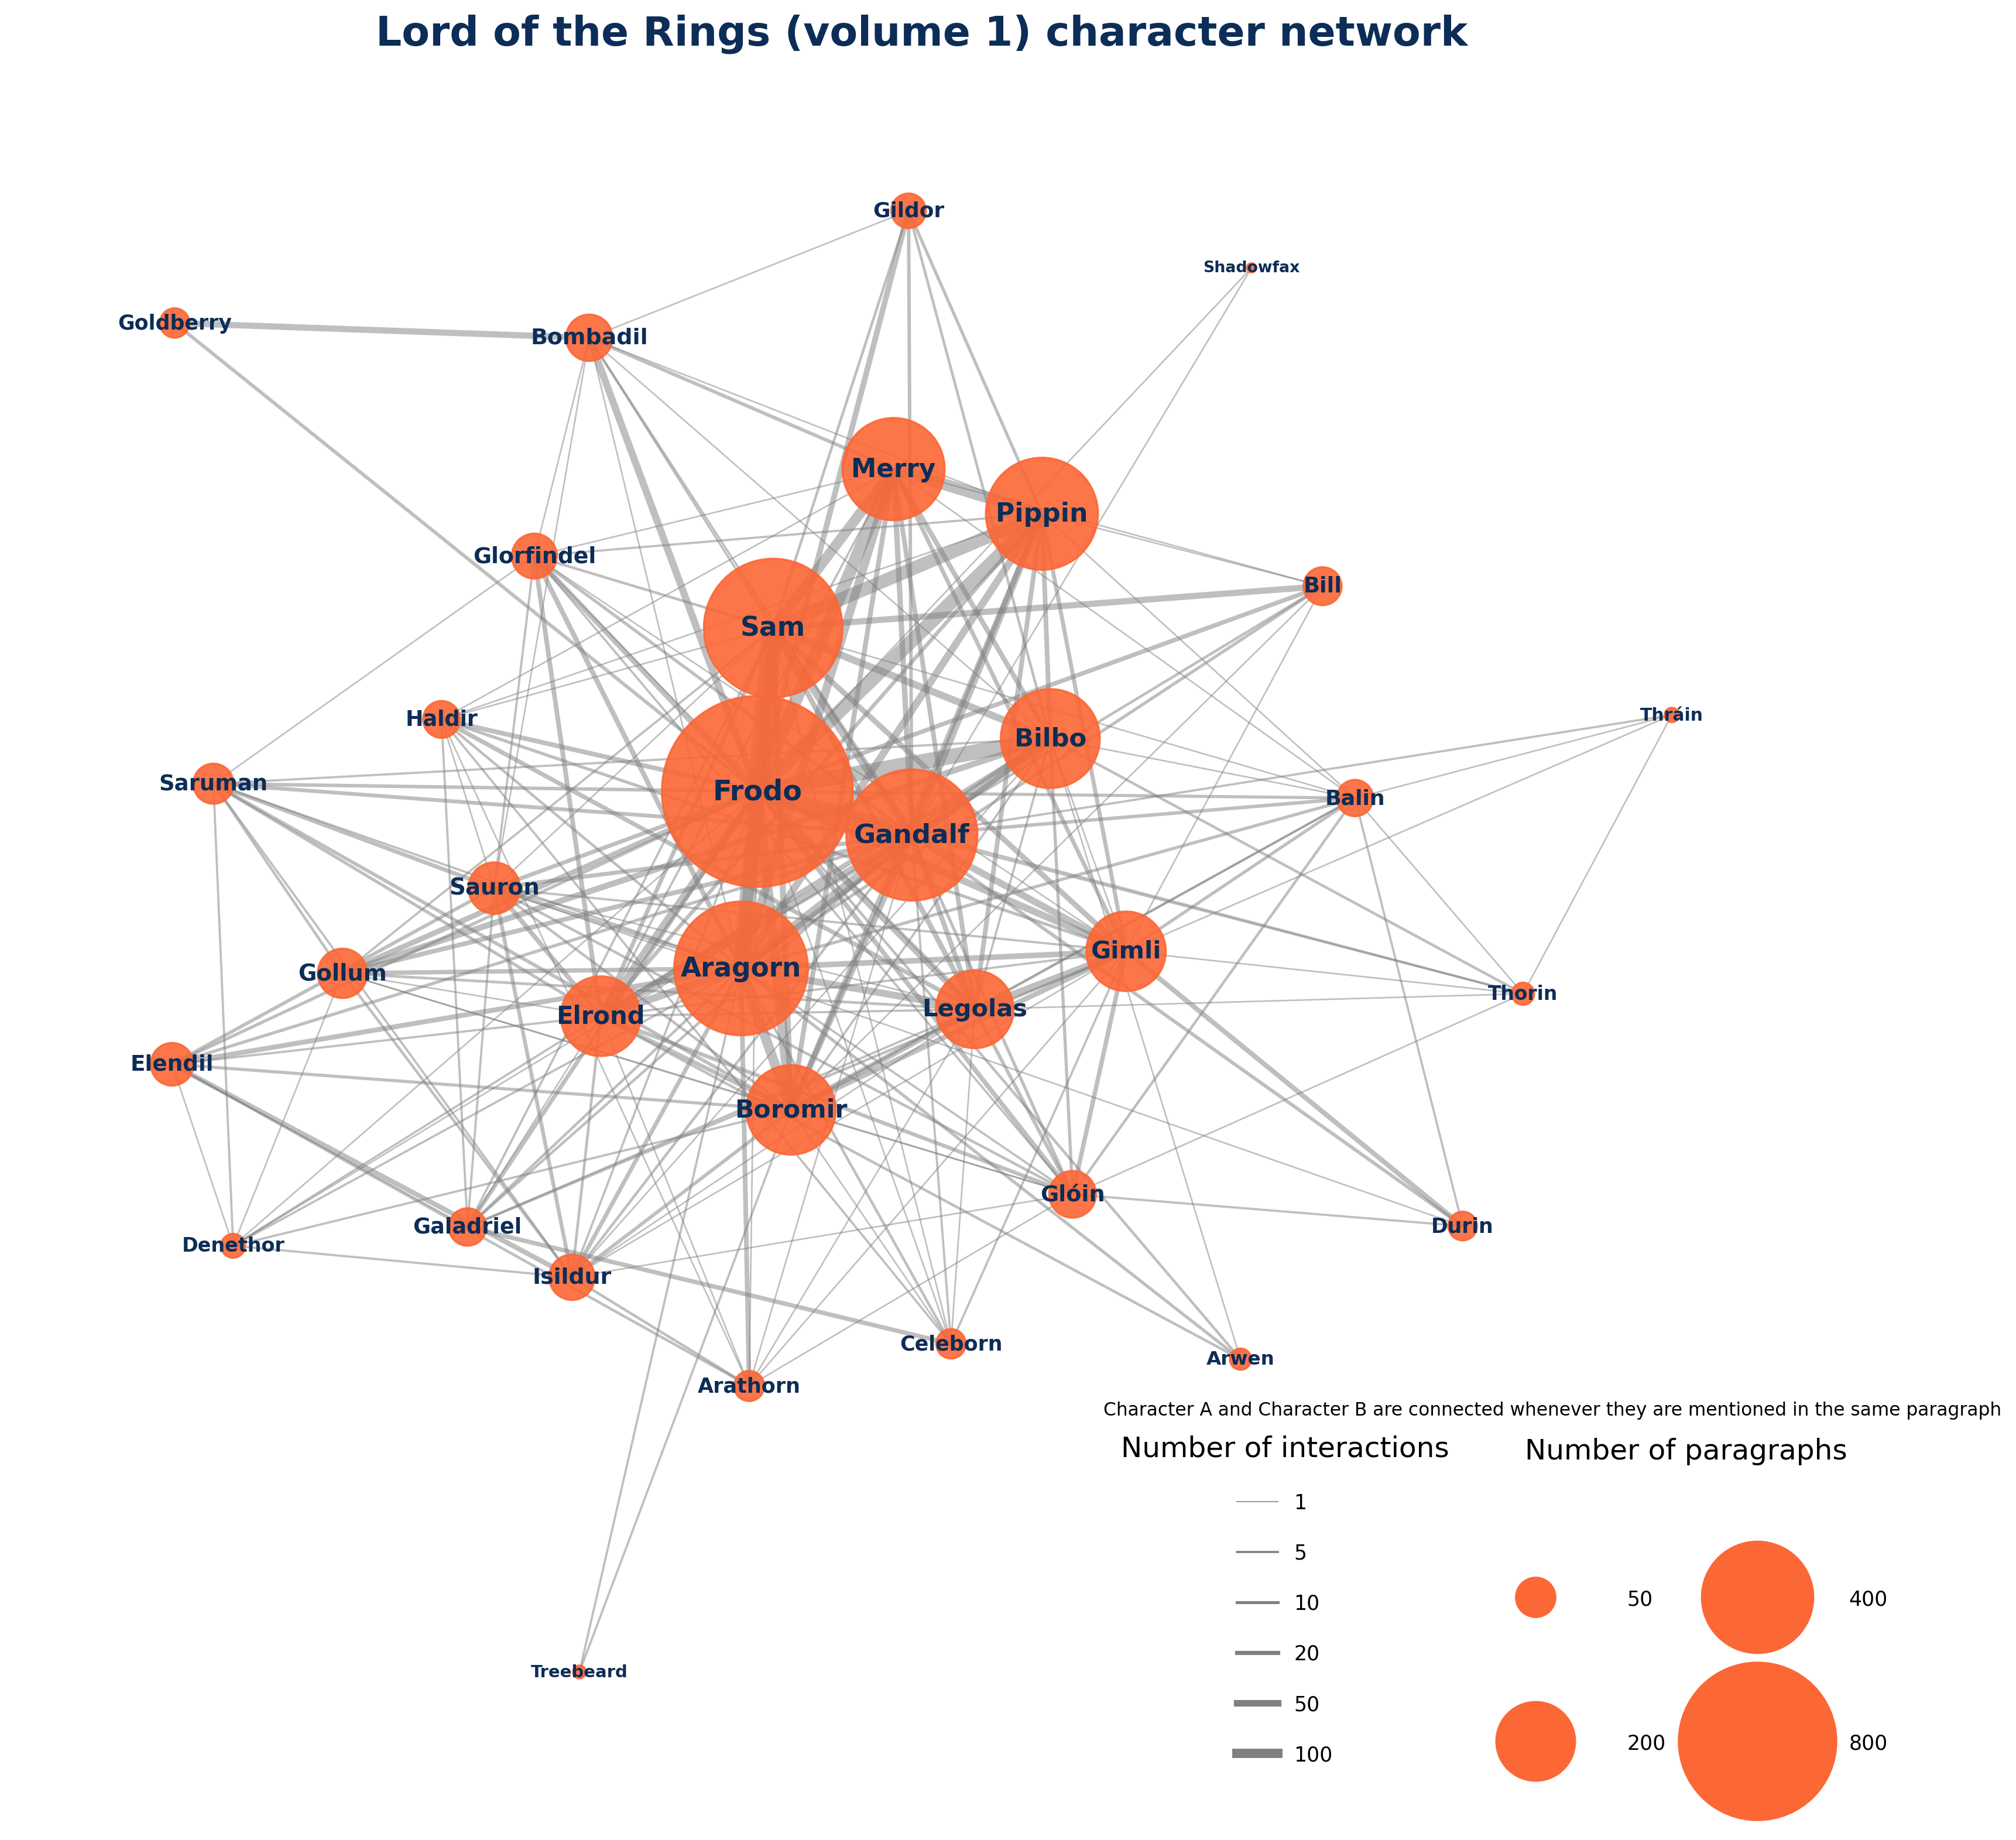

In [7]:
# stworzenie grafu
fig, ax = plt.subplots(1, 1, figsize = (16, 16), dpi = 250)
ax.set_title("Lord of the Rings (volume 1) character network", fontsize = 20, color = "#0C2D57", weight = "bold")
nx.draw_networkx_nodes(lotr_graph, 
    pos = pos, 
    node_color = "#FC6736", 
    node_size = node_size * 10, 
    alpha = 0.9,
    ax = ax
)
nx.draw_networkx_edges(
    lotr_graph,
    pos = pos,
    width=np.sqrt(weights / max_weight) * 10,
    edge_color = "gray",
    alpha = 0.5,
    ax = ax,
)

for i, (node, (x, y)) in enumerate(pos.items()):
    ax.text(x, y , node, fontsize = 7 + np.log(node_size[i]), ha = "center", va = "center",
           fontdict = {"color": "#0C2D57", "weight" : "bold"})

    
for w in [1, 5, 10, 20, 50, 100]:
    ax.plot([], [], "gray", linewidth = np.sqrt(w) / np.sqrt(max_weight) * 6, label = w)

# legenda dla krawędzi
edge_legend = ax.legend(
    title = "Number of interactions", 
    title_fontsize = 14,
    frameon = False, 
    bbox_to_anchor = (0.7, 0.024), 
    labelspacing = 1.5,
    loc = "lower center" 
)
ax.add_artist(edge_legend)

    
# legenda dla węzłów
legend = ax.legend(
    handles = [
        plt.Line2D(
            [], [], 
            color = "#FC6736", 
            marker = "o", 
            markersize = np.sqrt(size * 7.5), 
            linestyle = ""
        ) 
        for size in [50, 200, 400, 800]
    ],
    handletextpad = 2,
    labels = [50, 200, 400, 800],
    title = "Number of paragraphs", 
    title_fontsize = 14,
    frameon = False,
    ncol = 2,
    labelspacing = 6.1,
    handlelength = 5,
    handleheight = 1,
    bbox_to_anchor = (0.8, 0.13), 
    loc = "center left" 
)
ax.text(0.6, 0.24, 
"""Character A and Character B are connected whenever they are mentioned in the same paragraph""", 
    fontsize = 9, 
    transform = ax.transAxes,
    verticalalignment = "top" )
fig.set_facecolor("white")
plt.axis("off")
plt.savefig("lotr_graph.png", transparent = False)
plt.show()  